# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.17.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [115]:
dataset = pd.read_csv('drag_coef.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [117]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [118]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

### Adding the second hidden layer

In [119]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

### Adding the output layer

In [120]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [121]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [122]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100


21/21 [==============================] - 1s 1ms/step - loss: 230528.5312
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 194050.1406
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 166020.6719
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 142652.0312
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 126514.8281
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 113857.9844
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 102487.1562
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 94517.6484
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 88400.4922
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 83770.0469
Epoch 11/100
21/21 [==============================] - 0s 1ms/step - loss: 79997.1797
Epoch 12/100
21/21 [==============================] - 0s 1ms/step - loss: 77129

### Predicting the results of the Test set

In [123]:
y_pred = ann.predict(X_test)
y_pred_train = ann.predict(X_train)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

21/21 [==============================] - 0s 1ms/step
[[7.10e+00 1.49e+00]
 [5.08e+01 2.20e+01]
 [3.89e+01 1.17e+01]
 [5.02e+01 6.23e+01]
 [7.37e+00 1.26e+00]
 [3.59e+01 1.92e+01]
 [6.67e+01 8.22e+01]
 [7.25e+01 2.24e+02]
 [4.69e+00 1.00e+00]
 [6.92e+01 5.26e+01]
 [6.48e+01 2.96e+02]
 [6.66e+01 6.92e+01]
 [3.35e+00 1.45e+00]
 [6.41e+01 1.07e+02]
 [7.30e+01 7.48e+01]
 [8.36e+00 5.42e+00]
 [8.38e+00 1.36e+01]
 [3.87e+00 1.03e+00]
 [8.19e+00 3.84e+00]
 [6.14e+01 2.69e+02]
 [6.18e+00 8.61e-01]
 [8.35e+00 6.20e+00]
 [5.46e+01 1.16e+02]
 [8.29e+00 5.61e+00]
 [3.39e+01 1.26e+01]
 [6.95e+01 1.44e+02]
 [8.35e+00 4.95e+00]
 [3.22e+00 1.84e+00]
 [7.55e+00 1.29e+00]
 [8.11e+00 2.06e+00]
 [7.49e+00 8.64e-01]
 [6.41e+00 1.17e+00]
 [1.73e+01 7.14e+00]
 [8.25e+00 2.57e+00]
 [3.12e+01 1.12e+01]
 [5.94e+01 3.72e+01]
 [8.22e+00 2.56e+00]
 [6.89e+01 7.10e+01]
 [8.11e+00 3.12e+00]
 [5.91e+01 2.55e+01]
 [8.32e+00 5.73e+00]
 [3.96e+01 3.76e+01]
 [5.92e+00 1.18e+00]
 [5.62e+01 4.18e+01]
 [7.91e+00 1.88e+00]
 [

##Model Evaluation

In [124]:
from sklearn.metrics import r2_score
print('R2-score (training set): {:.3f}'.format(r2_score(y_train, y_pred_train)))
print('R2-score (test set): {:.3f}'.format(r2_score(y_test, y_pred)))


R2-score (training set): 0.036
R2-score (test set): 0.091


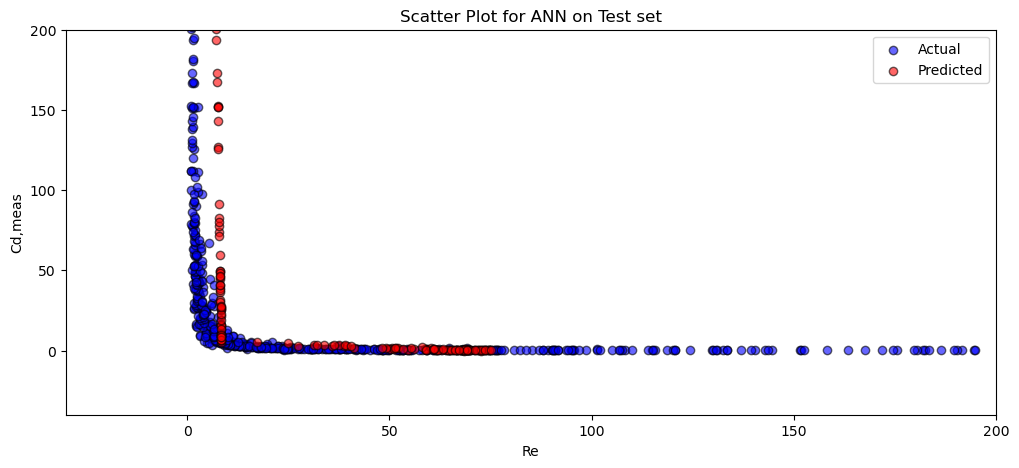

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.scatter( y ,X[:,-1], c = 'blue'  ,edgecolors='black', alpha=0.6, label = 'Actual')
plt.scatter( y_pred ,X_test[:,-1], c = 'red' ,edgecolors='black', alpha=0.6, label = 'Predicted')
##plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.ylim(-40, 200)
plt.xlim(-30, 200)
plt.title('Scatter Plot for ANN on Test set')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()

In [126]:
print('R2-score (test set): {:.3f}'.format(r2_score(y_pred ,X_test[:,-1])))

R2-score (test set): -711.532


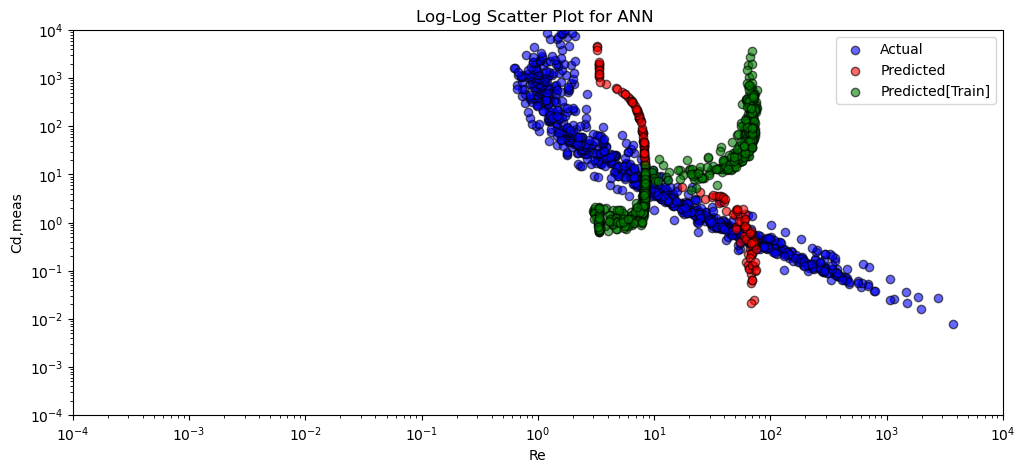

In [127]:
plt.figure(figsize=(12, 5))

plt.scatter(y, X[:, -1], c='blue',edgecolors='black', alpha=0.6, label='Actual')
plt.scatter(y_pred, X_test[:, -1], c='red', edgecolors='black', alpha=0.6,label='Predicted')
plt.scatter(y_pred_train,y_train, color='green',edgecolors='black', alpha=0.6, label='Predicted[Train]')

plt.xscale('log')
plt.yscale('log')

plt.ylim(0.0001,10000)
plt.xlim(0.0001,10000)

plt.title('Log-Log Scatter Plot for ANN ')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()

plt.show()

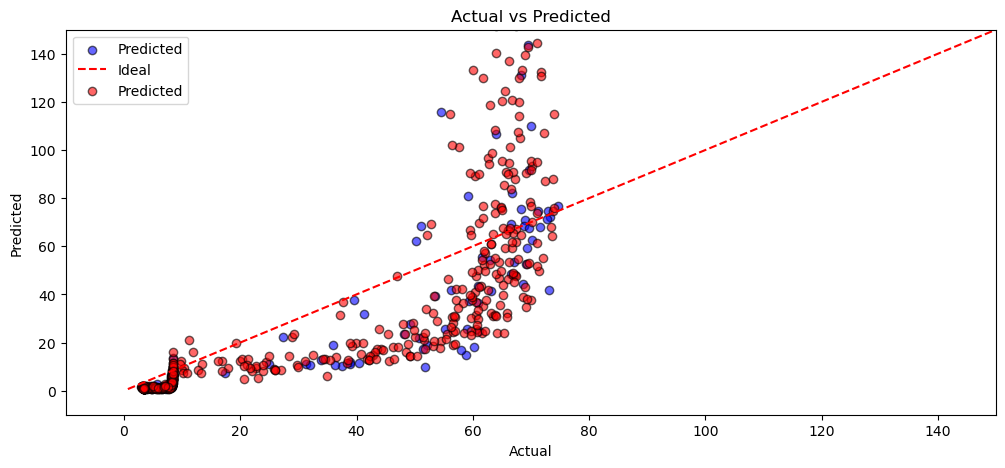

In [128]:
plt.figure(figsize=(12,5))
plt.scatter(y_pred,y_test, color='blue',edgecolors='black', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.scatter(y_pred_train,y_train, color='red',edgecolors='black', alpha=0.6, label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(-10, 150)
plt.ylim(-10, 150)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

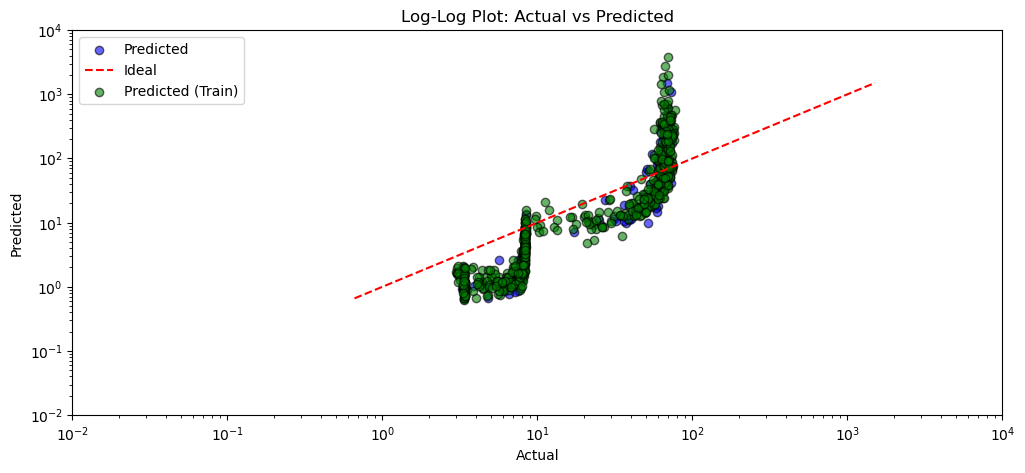

In [129]:
plt.figure(figsize=(12, 5))

plt.scatter(y_pred, y_test, color='blue',edgecolors='black', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.scatter(y_pred_train, y_train, color='green',edgecolors='black', alpha=0.6, label='Predicted (Train)')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.ylim(0.01,10000)
plt.xlim(0.01,10000)

plt.title('Log-Log Plot: Actual vs Predicted')
plt.legend()

plt.show()

<Figure size 1600x800 with 0 Axes>

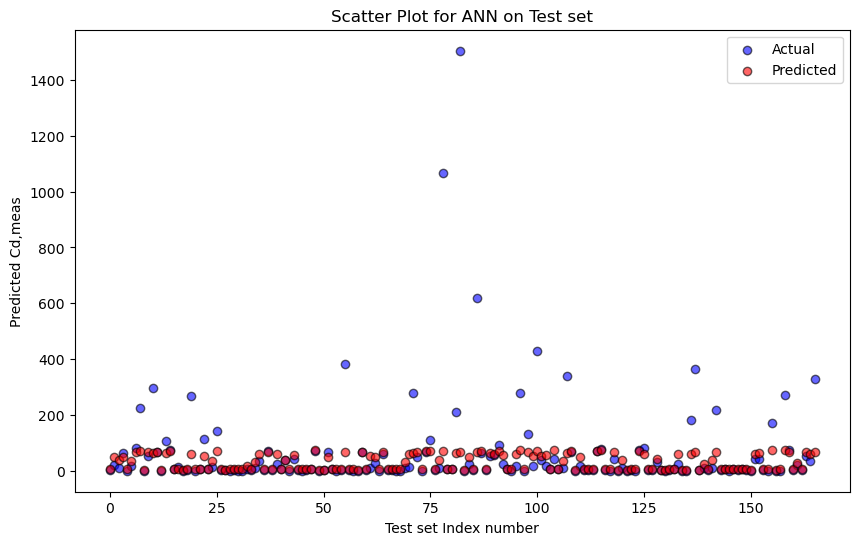

In [130]:
plt.figure(figsize=(16, 8))

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test , c = 'blue'  ,edgecolors='black', alpha=0.6, label = 'Actual')
plt.scatter(range(len(y_pred)), y_pred , c = 'red' ,edgecolors='black', alpha=0.6, label = 'Predicted')
plt.title('Scatter Plot for ANN on Test set')
plt.xlabel('Test set Index number')
plt.ylabel('Predicted Cd,meas')
plt.legend()

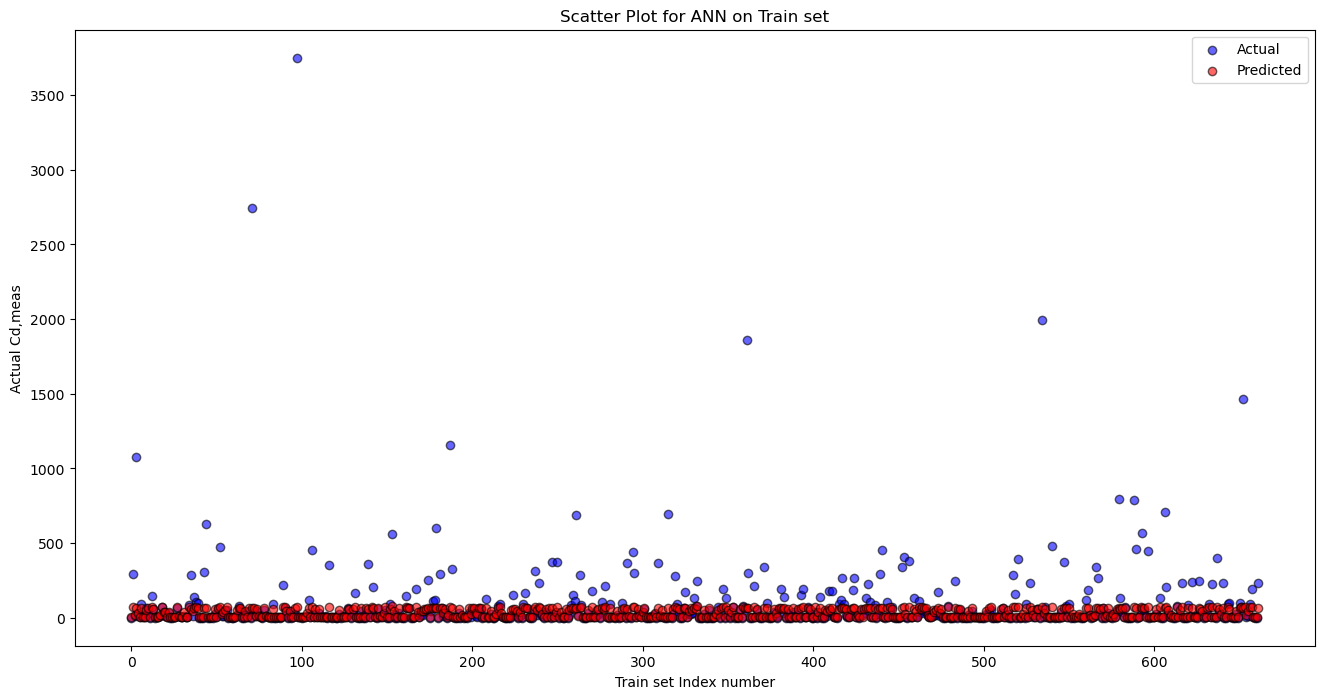

In [131]:
plt.figure(figsize=(16, 8))
plt.scatter(range(len(y_train)), y_train , c = 'blue'  ,edgecolors='black', alpha=0.6, label = 'Actual')
plt.scatter(range(len(y_pred_train)), y_pred_train , c = 'red' ,edgecolors='black', alpha=0.6, label = 'Predicted')
plt.title('Scatter Plot for ANN on Train set')
plt.ylabel('Actual Cd,meas')
plt.xlabel('Train set Index number')
plt.legend()
plt.show()
